# **MEDICAL COST ANALYSIS**

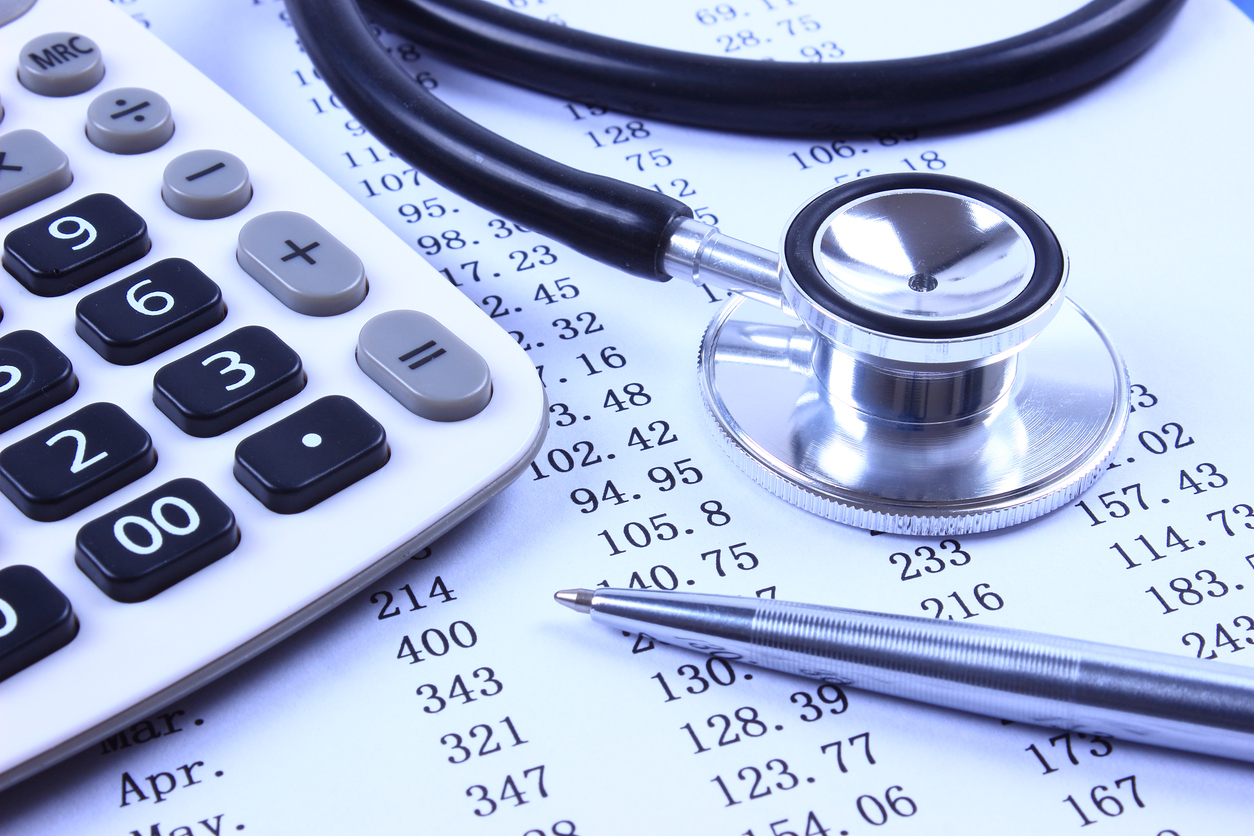

# Importing Required Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

1. Importing the data

In [54]:
data = pd.read_csv("insurance.csv")

2. Checking the data

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
data.shape

(1338, 7)

*the DataFrame has a shape of (1338, 7) , this implies that the DataFrame is made up of 1338 rows and 7 columns of data.*

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [58]:
# Checking if there is a missing value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
# Checking further information about the dataset (dtypes etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Perform An Exploratory Data Analysis
Analyze the data and draw meaningful conclusions from the data.

📌Examine the distribution of Bmi (Body Mass Index)


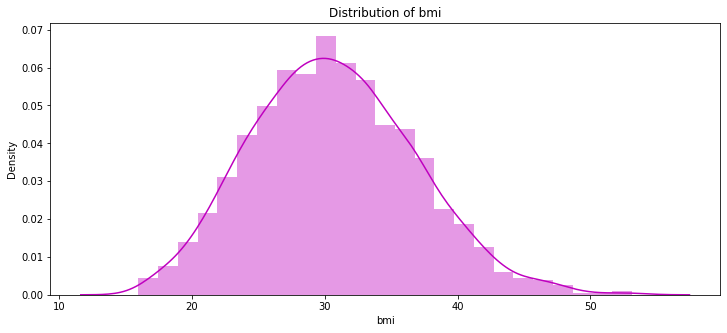

In [60]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

📌Examine the relationship between “smoker” and “charges”


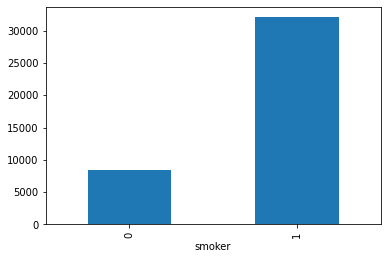

In [89]:
data.groupby(['smoker'])['charges'].mean().plot(kind='bar')

📌Examine the relationship between “smoker” and “region”.


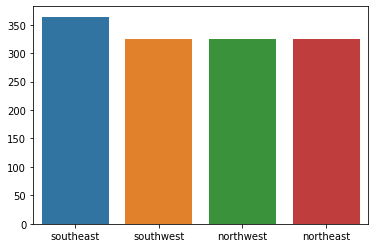

In [61]:
sns.barplot(x = data.region.value_counts().T.index,  y = data.region.value_counts().T.values)



📌Examine the relationship between “bmi” and “sex”.


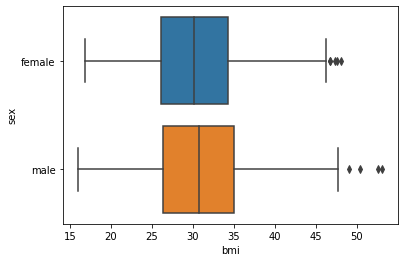

In [62]:

sns.boxplot(data=data, x = 'bmi', y = 'sex')

📌Find the "region" with the most "children".


In [63]:
children = data.groupby(by='region').sum()['children'].sort_values(ascending=False)
children

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

In [64]:
x = np.array(["southeast", "northwest", "southwest", "northeast"])

<BarContainer object of 4 artists>

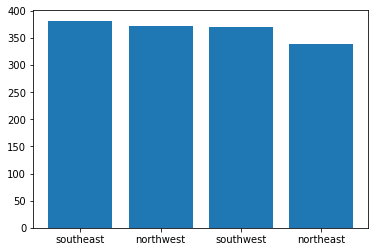

In [65]:
plt.bar(x,children) 

 📌Examine the relationship between “age” and “bmi”.

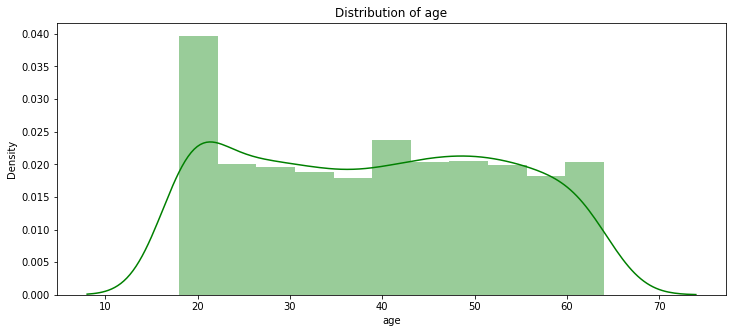

In [66]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

📌Examine the relationship between “age” and “bmi”. Examine the relationship between “bmi” and “children”.


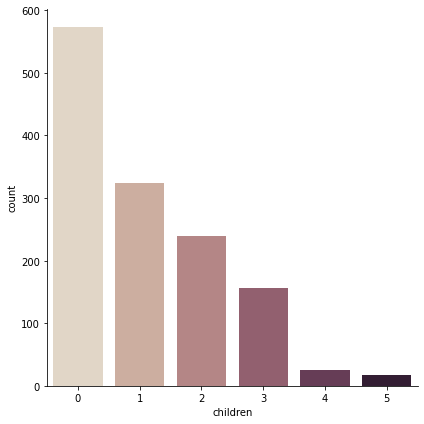

In [67]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

📌Is there an outlier in the "bmi" variable? Please review.


In [68]:
outliers = []

def find_outlier(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers  


In [69]:
outlier = find_outlier(data['bmi'])
outlier

[49.06, 50.38, 52.58, 53.13]

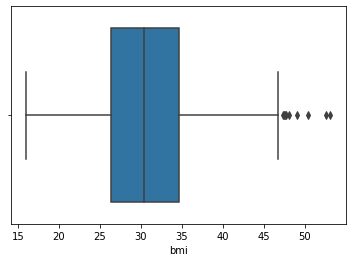

In [70]:
sns.boxplot(data['bmi'])

plt.show()

📌Examine the relationship between “bmi” and “charges”.


age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

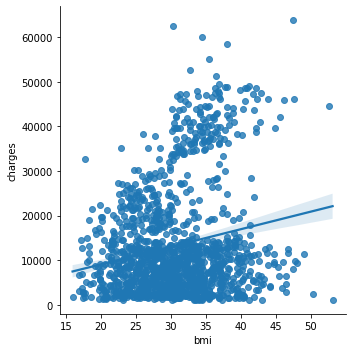

In [71]:
sns.lmplot(x='bmi',y='charges',data=data)
data.corr()['charges']

📌Examine the relationship between “region”, “smoker” and “bmi” using bar plot

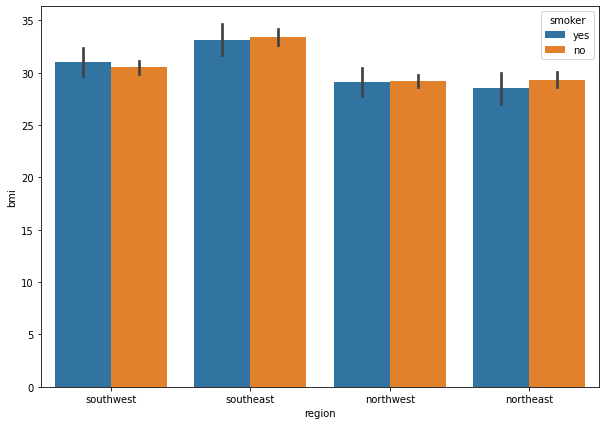

In [72]:
#which state has the most smoker

plt.figure(figsize=(10,7))

sns.barplot(x='region',y='bmi',hue='smoker',data = data)

**Try to use data visualization techniques as much as possible while examining the data.**

**Please add the meanings you deduced from the analyzes as a comment line**

# Data Preprocessing
In this section, prepare the data you have, for training the model.


📌Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.


*One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single label.*

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding the 'region' it has four different category
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(data['region'].values.reshape(-1,1))
data_dum = encoder.transform(data['region'].values.reshape(-1,1)).toarray()
# Label Encoding the 'sex'
label = LabelEncoder()
data.sex = label.fit_transform(data.sex.values.reshape(-1,1))
# Label Encoding the 'smoker'
label1 = LabelEncoder()
data.smoker = label1.fit_transform(data.smoker.values.reshape(-1,1))
data = pd.concat([data.iloc[:, :5],  pd.DataFrame(data=data_dum, columns=encoder.get_feature_names_out(['region'])), data[['charges']]], axis=1)

In [74]:
data.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520


📌Split your dataset into X_train,X_test, y_train, y_test.


In [75]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(data.drop(['charges'], axis=1), data.charges.values, test_size = 0.2, random_state = 42)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


📌Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

In [77]:
# Normalization between -1 and 1 
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
stand_scaler.fit(x_train)
x_train = stand_scaler.transform(x_train)
x_test = stand_scaler.transform(x_test)

# Model Selection


**📌Examine the performances of the selected models using cross validation.**

In [120]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print (f"""
  RMSE Scores: {scores}
  Mean: {scores.mean()}
  Standart_deviation: {scores.std()} 
  """)

### Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
lin_scores = cross_val_score(linear, x_train, y_train,scoring = "neg_mean_squared_error", cv=10)

In [119]:
lin_scores

array([-36815796.52179886, -43307871.90469339, -27458824.943926  ,
       -36456765.22000398, -34064321.21101741, -37545462.85261907,
       -53014180.37182798, -39875207.81500871, -38357145.09175085,
       -32283187.25725893])

In [121]:
score_display(lin_scores)


  RMSE Scores: [6067.6022053  6580.87166754 5240.11688266 6037.94379073 5836.4647871
 6127.43525895 7281.08373608 6314.68192509 6193.3145481  5681.82956954]
  Mean: 6136.134437108927
  Standart_deviation: 515.4905321307273 
  


### Stochastic Gradient Descent (SGD)

In [101]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_score = cross_val_score(sgd_reg, x_train, y_train,scoring = "neg_mean_squared_error", cv=10)

In [102]:

sgd_score

array([-36932289.41248035, -43198297.30662058, -27524857.19320801,
       -36395374.13336823, -34130679.50736853, -37518050.19141377,
       -53043961.21013833, -39992706.56897396, -38537937.0570614 ,
       -31892482.2069082 ])

In [122]:
score_display(sgd_score)


  RMSE Scores: [6077.19420559 6572.54116051 5246.4137459  6032.85787445 5842.1468235
 6125.19797161 7283.12853176 6323.9786977  6207.89312545 5647.34293335]
  Mean: 6135.8695069844625
  Standart_deviation: 517.4638847421004 
  


### K-Nearest Neighbors (KNN)

In [104]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_score =cross_val_score(knn, x_train, y_train,scoring = "neg_mean_squared_error", cv=10)

In [105]:
knn_score

array([-23871190.83359258, -30760227.01868398, -24386885.08386039,
       -25343122.32134764, -35578738.23129795, -30206229.20925308,
       -44665680.66926742, -37380236.64706188, -27760052.91577041,
       -28720110.42246419])

In [123]:
score_display(knn_score)


  RMSE Scores: [4885.81526806 5546.19031576 4938.30791708 5034.19530028 5964.79154969
 5496.01939673 6683.23878589 6113.93790016 5268.78097056 5359.1147051 ]
  Mean: 5529.039210932881
  Standart_deviation: 544.9520522272093 
  


### Decision Tree Regression


In [107]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree_score = cross_val_score(dec_tree, x_train, y_train,scoring = "neg_mean_squared_error", cv=10)

In [109]:
dec_tree_score

array([-38601063.65064919, -41866036.64390782, -49476896.77909555,
       -48480309.97430538, -43007369.98183264, -42284997.92879359,
       -52291648.49337145, -47657510.10790811, -45346438.71419545,
       -30505822.31187743])

In [124]:
score_display(dec_tree_score)


  RMSE Scores: [6212.97542653 6470.39694639 7033.9815737  6962.78033362 6558.00045607
 6502.69159109 7231.29646007 6903.44190299 6733.97644146 5523.20761079]
  Mean: 6613.2748742707845
  Standart_deviation: 465.19339626911744 
  


### Random Forest Regression

In [112]:

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest_score =cross_val_score(random_forest, x_train, y_train,scoring = "neg_mean_squared_error", cv=10)

In [113]:
random_forest_score

array([-23015968.8042446 , -28162399.06413287, -15040511.00494372,
       -19482153.47946808, -27237641.46633763, -24980768.63503964,
       -32017436.66373304, -29543655.47753072, -26460001.99177483,
       -20850719.43268085])

In [125]:
score_display(random_forest_score)


  RMSE Scores: [4797.49609737 5306.82570508 3878.20976804 4413.85925007 5218.96938737
 4998.07649352 5658.3952375  5435.40757235 5143.92865345 4566.25880045]
  Mean: 4941.742696519951
  Standart_deviation: 508.23687723376713 
  



**📌Choose the best performing model**:

*We will continue with the model with the lowest RMSE: RandomForestRegressor()*

# Hyper-parameter Optimization


Optimize the hyper-parameters of the model selected in the previous step.

Optimize parameters with Grid Search. (Grid Search or Randomized Search)

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

random = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

 *We use **neg_mean_scored_error** because  mse cannot return negative values. Although the difference between one value and the mean can be negative, this negative value is squared. Therefore all results are either positive or zero.*

In [128]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

# Model Evaluation


Evaluate the optimized model using regression model evaluation metrics. 

(Ex. Mean
Squared Error,
Mean Absolute Error etc.)

In [130]:
# Predicting the charges
y_test_pred = grid_search.best_estimator_.predict(x_test)
# Comparing the actual output values with the predicted values
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfp.head(10)

,Actual,Predicted
0,9095.06825,11347.907948
1,5272.17580,6022.904678
2,29330.98315,27811.716676
3,9301.89355,11297.105938
4,33750.29180,32276.622657
5,4536.25900,7363.187075
6,2117.33885,3705.787185
7,14210.53595,14766.756924
8,3732.62510,5645.748085
9,10264.44210,11721.469889


In [144]:
def regression_evaluation(y_test_pred):
  mse = mean_squared_error(y_test, y_test_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, y_test_pred)
  mae = mean_absolute_error(y_test, y_test_pred)

  print(f"""
    Mean Absolute Error:            {mae},
    Mean Squared Error:             {mse},
    Root Mean Squared Error:        {rmse},
    R Squared Value:                {r_squared}
  """)

In [145]:
regression_evaluation(y_test_pred)


    Mean Absolute Error:            2832.9914322995414,
    Mean Squared Error:             20897141.21475927,
    Root Mean Squared Error:        4571.339105203121,
    R Squared Value:                0.8653957361586133
  


**************

# Confidence Interval

In [147]:
from scipy import stats
confidence = 0.95
squared_errors = (y_test_pred - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
loc= squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([3600.44545598, 5369.45760278])

 *Needs improvement*